## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [4]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 之前做過的處理

In [5]:
# 設定 data_path
dir_data = '../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

--------------------------------------------------------------------------------------------------

In [40]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BINNED'] = pd.cut(app_train['YEARS_BIRTH'],  11 )
AGE = pd.DataFrame(app_train['YEARS_BINNED'].value_counts())
AGE

,YEARS_BINNED
"(38.192, 42.61]",38108
"(33.773, 38.192]",36195
"(29.355, 33.773]",35088
"(42.61, 47.028]",34019
"(51.447, 55.865]",31287
"(47.028, 51.447]",29772
"(55.865, 60.284]",29229
"(24.936, 29.355]",28156
"(60.284, 64.702]",24079
"(20.469, 24.936]",11860


Text(0,0.5,'COUNTS')

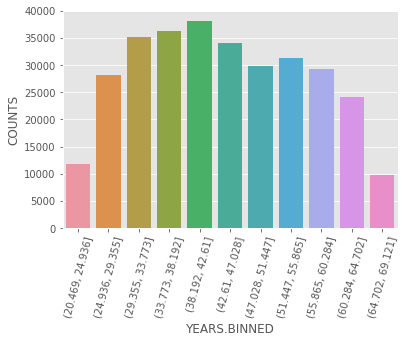

In [42]:
plt.style.use('ggplot')
sns.barplot( AGE.index , AGE['YEARS_BINNED'])
plt.xticks(rotation = 75) ; plt.xlabel('YEARS.BINNED'); plt.ylabel('COUNTS')

In [43]:
app_train['AMT_GOODS_PRICE_BINNED'] = pd.qcut(app_train['AMT_GOODS_PRICE'],  10 )
GP = pd.DataFrame(app_train['AMT_GOODS_PRICE_BINNED'].value_counts())
GP

,AMT_GOODS_PRICE_BINNED
"(522000.0, 675000.0]",42417
"(40499.999, 180000.0]",39484
"(373500.0, 450000.0]",35052
"(180000.0, 225000.0]",31970
"(814500.0, 1093500.0]",30745
"(1093500.0, 4050000.0]",30685
"(225000.0, 270000.0]",27990
"(450000.0, 522000.0]",26475
"(270000.0, 373500.0]",23483
"(675000.0, 814500.0]",18932


Text(0,0.5,'COUNTS')

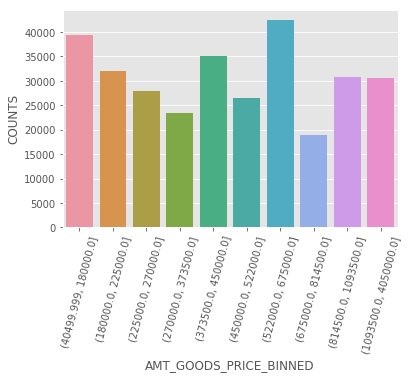

In [44]:
sns.barplot( GP.index , GP['AMT_GOODS_PRICE_BINNED'])
plt.xticks(rotation = 75) ; plt.xlabel('AMT_GOODS_PRICE_BINNED'); plt.ylabel('COUNTS')

### Abnormal QCUT Result????

In [35]:
app_train['INCOME_BINNED'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
IC = pd.DataFrame(app_train['INCOME_BINNED'].value_counts())
IC

,INCOME_BINNED
"(112500.0, 135000.0]",48849
"(180000.0, 225000.0]",44809
"(99000.0, 112500.0]",36907
"(25649.999, 81000.0]",33391
"(147150.0, 162000.0]",31120
"(162000.0, 180000.0]",30704
"(81000.0, 99000.0]",30280
"(270000.0, 117000000.0]",27161
"(225000.0, 270000.0]",19957
"(135000.0, 147150.0]",4333


Text(0,0.5,'COUNTS')

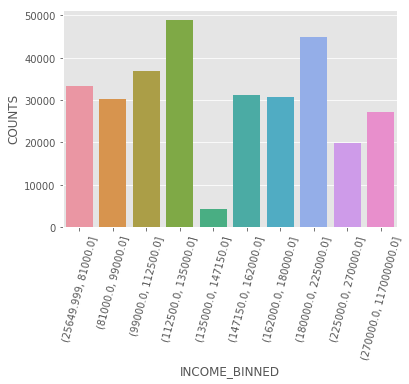

In [45]:
sns.barplot(IC.index, IC['INCOME_BINNED'])
plt.xticks(rotation=75);plt.xlabel('INCOME_BINNED'); plt.ylabel('COUNTS')

### Same Problem ( Abnormal QCUT results ). 
### It may be caused by enormous amounts of counts in single interval.
    